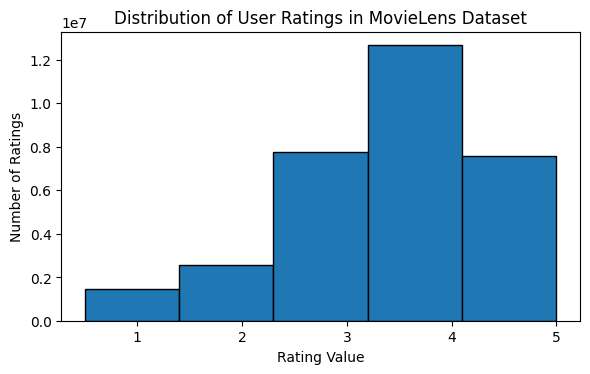

In [19]:
import sys, os
import pandas as pd
import matplotlib.pyplot as plt

sys.path.append(os.getcwd())

from Backend.src.recommenders.utils.matrix_builder import load_data

# Load real dataset
movies, ratings = load_data()

plt.figure(figsize=(6,4))
plt.hist(ratings["rating"], bins=5, edgecolor="black")
plt.xlabel("Rating Value")
plt.ylabel("Number of Ratings")
plt.title("Distribution of User Ratings in MovieLens Dataset")
plt.tight_layout()
plt.savefig("figure_1_rating_distribution.png")
plt.show()


In [20]:
import numpy as np
import pandas as pd

from Backend.src.recommenders.model_based.svd_cf import SVD_CF

# Load trained SVD model
svd = SVD_CF()

# Pick a real user
USER_ID = ratings["user_id"].iloc[0]
TOP_N = 10

# Generate real recommendations
svd_recs = svd.recommend(USER_ID, top_n=TOP_N)

# Convert to DataFrame for visualization
svd_df = pd.DataFrame(svd_recs, columns=["movie_id", "predicted_score"])
svd_df = svd_df.merge(movies, on="movie_id")[["title", "predicted_score"]]

svd_df


,title,predicted_score
0,City Hall (1996),6.175430
1,Batman Forever (1995),5.650941
2,"Usual Suspects, The (1995)",5.463007
3,"Brothers McMullen, The (1995)",5.311499
4,Jury Duty (1995),5.222144
5,First Knight (1995),5.197304
6,Nick of Time (1995),5.171843
7,Sabrina (1995),5.034437
8,Living in Oblivion (1995),4.950904
9,Judge Dredd (1995),4.911698


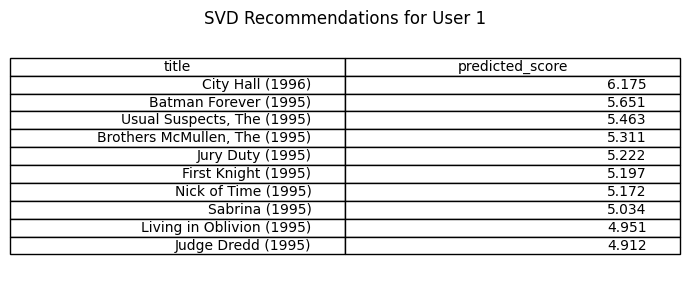

In [21]:
plt.figure(figsize=(7,3))
plt.axis("off")
plt.table(
    cellText=svd_df.round(3).values,
    colLabels=svd_df.columns,
    loc="center"
)
plt.title(f"SVD Recommendations for User {USER_ID}")
plt.tight_layout()
plt.savefig("figure_2_svd_recommendations.png")
plt.show()


In [22]:
from Backend.src.recommenders.content_based.content_based import ContentBasedRecommender

# Load content-based model
cb = ContentBasedRecommender()

# Pick a real movie from dataset
REFERENCE_MOVIE_ID = movies["movie_id"].iloc[0]

# Get similar movies
similar_df = cb.recommend_similar(REFERENCE_MOVIE_ID, top_n=10)

# Display key columns
similar_df = similar_df[["title", "vote_average"]]
similar_df


Loading movie metadata...
Loading pre-trained content model artifacts...


,title,vote_average
505,Poetic Justice (1993),NaN
1045,Macao (1952),NaN
1248,"Great Dictator, The (1940)",NaN
1007,Pete's Dragon (1977),NaN
1491,Schizopolis (1996),NaN
63,Two if by Sea (1996),NaN
1089,"Eighth Day, The (Huitième jour, Le) (1996)",NaN
1143,Bob Roberts (1992),NaN
1515,When the Cat's Away (Chacun cherche son chat) ...,NaN
496,Naked (1993),NaN


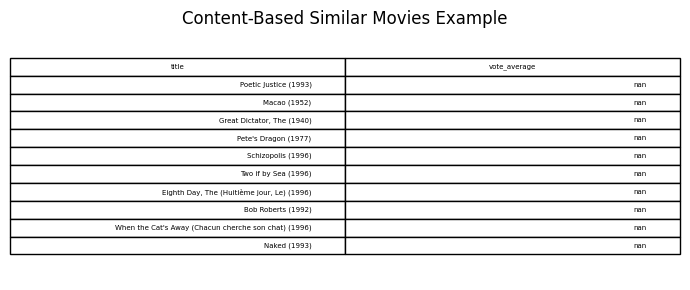

In [23]:
plt.figure(figsize=(7,3))
plt.axis("off")
plt.table(
    cellText=similar_df.values,
    colLabels=similar_df.columns,
    loc="center"
)
plt.title("Content-Based Similar Movies Example")
plt.tight_layout()
plt.savefig("figure_3_content_similarity.png")
plt.show()
